In [13]:

from heapq import merge
import streamlit as st
import math
# mdates
import matplotlib.dates as mdates


import pandas as pd
import numpy as np
from pandas.core.arrays.datetimelike import timedelta
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor

In [15]:
# create simple streamlit application
df_1 = pd.read_csv("Book 2 gases.csv")
df_2 = pd.read_csv("Book2.csv")

In [6]:
def mergeDf(df1,df2):
#  df1 = pd.read_csv(file_name_1)
#  df2 = pd.read_csv(file_name_2)
# set time as index
# in this case we are using 'time' column
# but in your case it might be called something else
# make sure to change it accordingy
 df1.astype(str)
 df1["DateAndTime"] = df1["Date"] + " " +df1["Time"]
 df1["DateAndTime"] = pd.to_datetime(df1["DateAndTime"])
 df2.astype(str)
 df2["DateAndTime"] = df2["Date"] + " " +df2["Time"]
 df2["DateAndTime"] = pd.to_datetime(df2["DateAndTime"])

 df1.set_index('DateAndTime', inplace=True)
 df2.set_index('DateAndTime', inplace=True)

# identify the time difference in df1
 interval_1 = df1.index[1] - df1.index[0]
 secs_1 = interval_1.total_seconds()
# identify the time difference in df2
 interval_2 = df2.index[1] - df2.index[0]
 secs_2 = interval_2.total_seconds()

# the LCM of the two intervals is the new time interval we want
# new interval lcm of two float
 def lcm(a, b):
     return abs(a*b) // math.gcd(a, b) if a and b else 0
 def lcm_float(a, b, precision):
    a = round(a, precision)
    b = round(b, precision)
    return math.lcm(int(a*10**precision), int(b*10**precision))/10**precision
 new_interval = lcm_float(secs_1, secs_2, 2)
 new_interval= timedelta(seconds=20)

# resample the dataframes to the new interval
# here we use mean() to aggregate the resampled data
 resampled_df1 = df1.resample(new_interval).mean()
 resampled_df2 = df2.resample(new_interval).mean()

# perform a inner join on the two dataframes
 out_df = pd.merge(resampled_df1, resampled_df2, how='inner', left_index=True, right_index=True)

 return out_df

def clean_col(df):
 df= df.dropna(axis=1, thresh=df.shape[0]*0.4)
 cols = df.columns
 for i in cols :
  if df[i].isna().sum() < df.shape[0]*0.4:
   df[i] = df[i].fillna(df[i].mean())
  else:
    df = df.drop(columns=i)
    
 return df

def cor(df):
    corr = df.corr()
    return corr

# print equation of curve fit:
def convert(s):
 
    # initialization of string to ""
    new = ""
 
    # traverse in the string
    for x in s:
        new += x
 
    # return string
    return new

def curve_equation(x,y,degree):
    z = np.polyfit(x, y, degree)
    f = np.poly1d(z)
    coeff = []
    deg = []
    for d, c in enumerate(f):
        coeff.append(c)
        deg.append(d) 
    
    deg.sort(reverse=True)
    poly = pd.DataFrame({'coeff':coeff,'deg':deg})
    eq = []
    for c,d in zip(poly['coeff'],poly['deg']):
        eq.append(str(c)+' x^'+str(d))
        if d!=0:
            eq.append(" + ")
        
#     st.write("**Equation of the curve is:**")
#     st.write(convert(eq))

    #plot curve
    polyline = np.linspace(min(x), max(x), 50)
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    ax.plot(polyline, f(polyline), '--', color='black')
    x = pd.DataFrame(x)
    y = pd.DataFrame(y) 
    ax.set_xlabel(x.columns[0])
    ax.set_ylabel(y.columns[0])
#     st.pyplot(fig)                

def adjR(x, y, degree):
    results = []
    degrees = []
    for i in range(1, degree+1):
        coeffs = np.polyfit(x, y, i)
        p = np.poly1d(coeffs)
        yhat = p(x)
        ybar = np.sum(y)/len(y)
        ssreg = np.sum((yhat-ybar)**2)
        sstot = np.sum((y - ybar)**2)
        results.append(1- (((1-(ssreg/sstot))*(len(y)-1))/(len(y)-i-1)))
        degrees.append(i)
        
    best_degree = degrees[results.index(max(results))]
#     st.write("Best Degree: ", best_degree)
#     st.write("**Best Adjusted R-Squared is:**", max(results))
    curve_equation(x,y,best_degree)

In [17]:

Gases= ['CO2 35C', 'Acetaldehyde  35c', 'Formaldehyde 35c']
Sensors= ['VOC_Sensor {device="MQ135", name="VOC_data"}', 'VOC_Sensor {device="MQ138", name="VOC_data"}', 'VOC_Sensor {device="MQ9", name="VOC_data"}', 'VOC_Sensor {device="MQ3", name="VOC_data"}']



In [19]:
out_df=mergeDf(df_1,df_2)
clean_df=clean_col(out_df)

C:\Users\RAGUL\AppData\Local\Temp\ipykernel_2300\1707953647.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].fillna(df[i].mean())


C:\Users\RAGUL\AppData\Local\Temp\ipykernel_2300\1164918280.py:1: RankWarning: Polyfit may be poorly conditioned
  adjR(clean_df["Acetaldehyde  35c"], clean_df['VOC_Sensor {device="MQ135", name="VOC_data"}'], 10)
C:\Users\RAGUL\AppData\Local\Temp\ipykernel_2300\1164918280.py:1: RankWarning: Polyfit may be poorly conditioned
  adjR(clean_df["Acetaldehyde  35c"], clean_df['VOC_Sensor {device="MQ135", name="VOC_data"}'], 10)
C:\Users\RAGUL\AppData\Local\Temp\ipykernel_2300\1164918280.py:1: RankWarning: Polyfit may be poorly conditioned
  adjR(clean_df["Acetaldehyde  35c"], clean_df['VOC_Sensor {device="MQ135", name="VOC_data"}'], 10)
C:\Users\RAGUL\AppData\Local\Temp\ipykernel_2300\1164918280.py:1: RankWarning: Polyfit may be poorly conditioned
  adjR(clean_df["Acetaldehyde  35c"], clean_df['VOC_Sensor {device="MQ135", name="VOC_data"}'], 10)


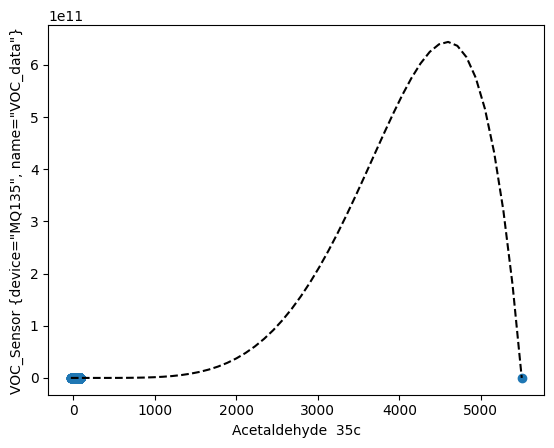

In [22]:
adjR(clean_df["Acetaldehyde  35c"], clean_df['VOC_Sensor {device="MQ135", name="VOC_data"}'], 10)

In [21]:
clean_df[Gases]

,CO2 35C,Acetaldehyde 35c,Formaldehyde 35c
DateAndTime,,,
2022-09-21 17:22:00,0.215833,0.026469,-0.017801
2022-09-21 17:22:20,0.253371,0.019397,0.000973
2022-09-21 17:22:40,0.273390,0.012550,-0.002865
2022-09-21 17:23:00,0.307986,0.013283,0.033785
2022-09-21 17:23:20,-0.032670,0.009149,0.025335
...,...,...,...
2022-09-23 08:20:40,-23.752412,2.019646,4.348605
2022-09-23 08:21:00,-29.578384,3.417246,-1.863149
2022-09-23 08:21:20,25.048401,-0.467879,4.332581


In [28]:
# create simple streamlit application
df_1 = pd.read_csv("Gases 3 sets.csv")
df_2 = pd.read_csv("sensors 3 sets.csv")

In [31]:
out_df=mergeDf(df_1,df_2)
out_df

,Carbon Monoxide Low 35c,CO2 35C,H2O% 35C,N2O (Hitran) 35C,Nitric Oxide 35c,NO2 Low 35C,Formaldehyde 35c,Methanol 35c,Methane Low 35c,Acetaldehyde 35c,...,Bad Scan counter,Centerburst Location,Linearizer Check,SNR 2500,sBeam @ 2500,"VOC_Sensor {device=""F1"", name=""VOC_data""}","VOC_Sensor {device=""MQ135"", name=""VOC_data""}","VOC_Sensor {device=""MQ138"", name=""VOC_data""}","VOC_Sensor {device=""MQ3"", name=""VOC_data""}","VOC_Sensor {device=""MQ9"", name=""VOC_data""}"
DateAndTime,,,,,,,,,,,,,,,,,,,,,
2022-09-19 16:58:40,-0.104719,2.238043,0.054444,-0.005247,0.112884,-0.017670,0.060305,-0.011896,0.069657,0.007971,...,0.0,1160.393311,0.000420,NaN,1.677392,0.0,185.0,2757.0,1330.0,280.0
2022-09-19 16:59:00,-0.097988,1.909428,0.053705,-0.000178,0.136157,-0.004709,0.018841,-0.000216,0.188082,0.029471,...,0.0,1160.391876,0.000391,1958.902405,1.678267,NaN,185.0,2143.0,1346.0,277.0
2022-09-19 16:59:20,-0.104469,1.644956,0.050593,0.005149,0.035777,-0.027631,-0.021185,0.010628,0.181093,0.007363,...,0.0,1160.390137,0.000416,2558.482015,1.677958,NaN,208.0,1957.0,1339.0,275.0
2022-09-19 16:59:40,-0.098843,1.697025,0.047566,0.002793,0.058833,0.003802,0.055009,-0.000599,0.013891,-0.007552,...,0.0,1160.388916,0.000405,2570.935954,1.677474,NaN,181.0,2618.0,1339.0,273.0
2022-09-19 17:00:00,-0.110482,1.352869,0.044280,-0.003478,0.032399,0.010002,0.031918,0.015307,0.294395,-0.006657,...,0.0,1160.387329,0.000413,2502.619202,1.678121,NaN,183.0,3402.0,1331.0,271.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-23 08:20:40,4.710240,-23.752412,-0.154772,2.939459,9.494311,-44.764764,4.348605,83.715124,1.448731,2.019646,...,0.0,1152.000000,0.000320,0.178513,-0.000531,NaN,89.4,2339.0,569.0,93.8
2022-09-23 08:21:00,1.852923,-29.578384,-0.036878,-0.190049,9.948933,-34.762532,-1.863149,240.013719,72.788644,3.417246,...,0.0,1152.000000,0.000212,0.178364,0.000173,0.0,88.3,1618.0,582.0,88.8
2022-09-23 08:21:20,4.253588,25.048401,-0.200712,-1.502421,7.591604,-36.312522,4.332581,254.488673,101.857881,-0.467879,...,0.0,1152.000000,0.000306,0.434614,0.005277,NaN,85.9,3145.0,573.0,95.6


In [32]:
clean_df=clean_col(out_df)
clean_df

""
DateAndTime
2022-09-19 16:58:40
2022-09-19 16:59:00
2022-09-19 16:59:20
2022-09-19 16:59:40
2022-09-19 17:00:00
...
2022-09-23 08:20:40
2022-09-23 08:21:00
2022-09-23 08:21:20


<AxesSubplot: xlabel='DateAndTime'>

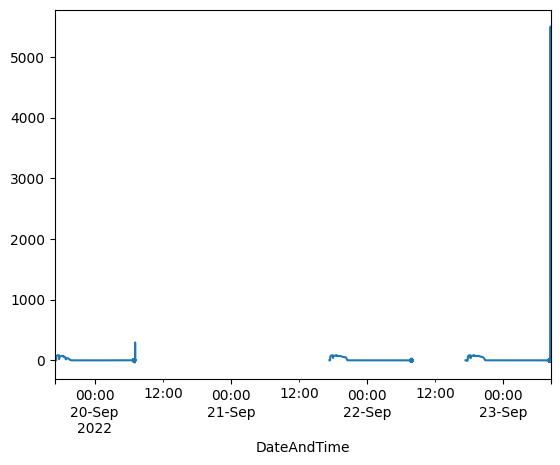

In [35]:
out_df["Acetaldehyde  35c"].plot()

<AxesSubplot: xlabel='DateAndTime'>

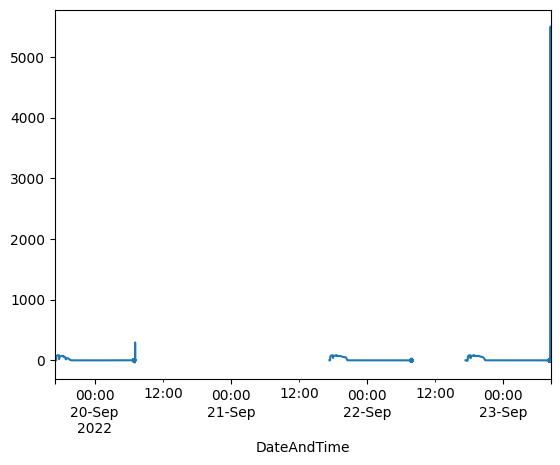

In [36]:
out_df["Acetaldehyde  35c"].plot()

In [37]:
out_df=out_df.interpolate(method='pad', limit_direction='forward', axis=0)

<AxesSubplot: xlabel='DateAndTime'>

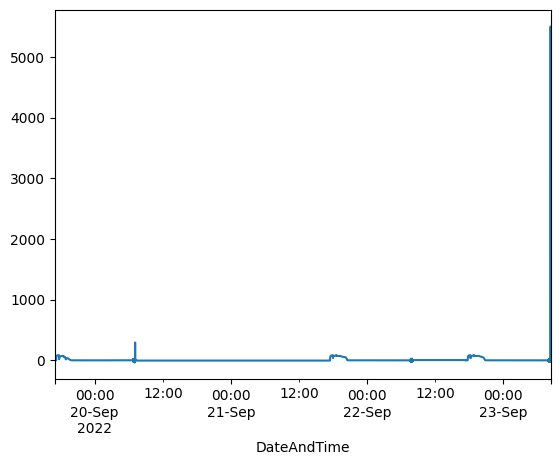

In [38]:
out_df["Acetaldehyde  35c"].plot()

C:\Users\RAGUL\AppData\Local\Temp\ipykernel_2300\1151530164.py:1: RankWarning: Polyfit may be poorly conditioned
  adjR(out_df["Acetaldehyde  35c"], out_df['VOC_Sensor {device="MQ135", name="VOC_data"}'], 10)
C:\Users\RAGUL\AppData\Local\Temp\ipykernel_2300\1151530164.py:1: RankWarning: Polyfit may be poorly conditioned
  adjR(out_df["Acetaldehyde  35c"], out_df['VOC_Sensor {device="MQ135", name="VOC_data"}'], 10)
C:\Users\RAGUL\AppData\Local\Temp\ipykernel_2300\1151530164.py:1: RankWarning: Polyfit may be poorly conditioned
  adjR(out_df["Acetaldehyde  35c"], out_df['VOC_Sensor {device="MQ135", name="VOC_data"}'], 10)
C:\Users\RAGUL\AppData\Local\Temp\ipykernel_2300\1151530164.py:1: RankWarning: Polyfit may be poorly conditioned
  adjR(out_df["Acetaldehyde  35c"], out_df['VOC_Sensor {device="MQ135", name="VOC_data"}'], 10)
C:\Users\RAGUL\AppData\Local\Temp\ipykernel_2300\1707953647.py:121: RankWarning: Polyfit may be poorly conditioned
  curve_equation(x,y,best_degree)


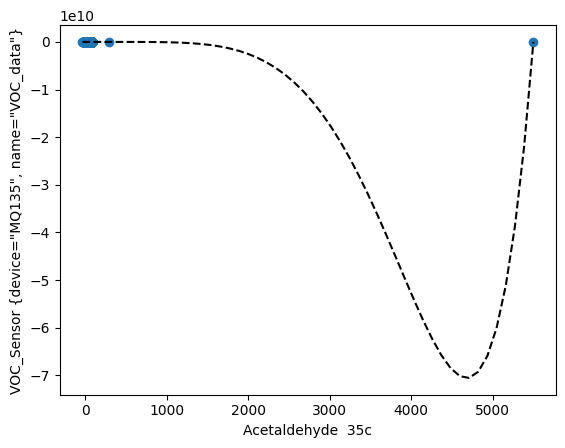

In [39]:
adjR(out_df["Acetaldehyde  35c"], out_df['VOC_Sensor {device="MQ135", name="VOC_data"}'], 10)

In [27]:
clean_df

""
DateAndTime
2022-09-19 16:58:40
2022-09-19 16:59:00
2022-09-19 16:59:20
2022-09-19 16:59:40
2022-09-19 17:00:00
...
2022-09-23 08:20:40
2022-09-23 08:21:00
2022-09-23 08:21:20
